<a href="https://colab.research.google.com/github/meetgoel/ML-Projects/blob/main/SupervisedLearning/M505A_Walmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

In this project, I've developed a Machine Learning pipeline to predict weekly sales for Walmart locations utilizing a dataset that includes several influencing variables.

The aim of this pipeline is to utilize past data and external economic indicators to develop a predictive model that assists Walmart in forecasting weekly sales with greater precision. This can enhance inventory planning, workforce management, and strategic decisions — particularly during significant holidays and economic changes.



##The dataset contains essential attributes:

**Store:** Distinct identifier for every store.

**Date:** The weekly date linked to the sales information.

**Weekly_Sales:** Key variable indicating the sales income for the week.

**Holiday_Flag:** A binary marker indicating if the week featured a significant holiday.

**Temperature:** The local temperature (measured in Fahrenheit), which may influence customer actions.

**Fuel_Cost:** Cost of fuel in the area — a possible economic signal.

**CPI (Consumer Price Index):** Indicating inflation and the prices of commodities as they change over time.

**Unemployment:** The unemployment rate in a region, which can affect the purchasing power of consumers

Dataset Link: https://www.kaggle.com/datasets/yasserh/walmart-dataset/data#

##Importing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

##Reading the Dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/meetgoel/ML-Projects/refs/heads/main/Datasets/Walmart.csv')

##Exploratory Data Analysis (EDA)

In [ ]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
dataset.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
dataset.duplicated().value_counts()

,count
False,6435


In [ ]:
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Outlier Detection

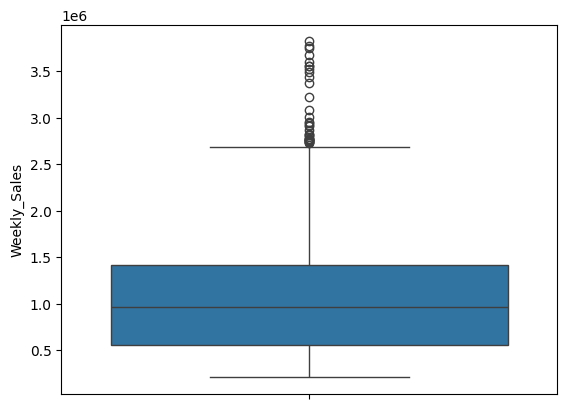

In [ ]:
sns.boxplot(dataset['Weekly_Sales'])
plt.show()

As weekly_sales is our target variable, i am not removing any outlier from this column as it may contain some valuable info.

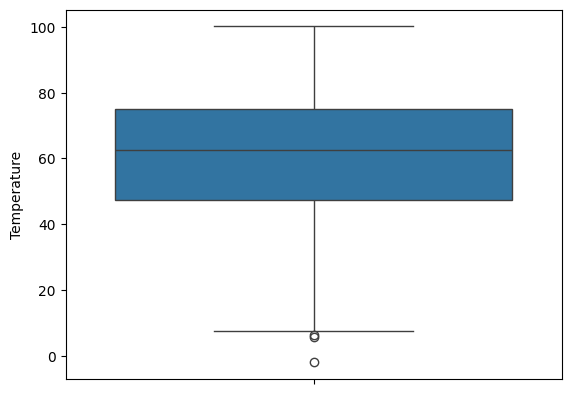

In [ ]:
sns.boxplot(dataset['Temperature'])
plt.show()

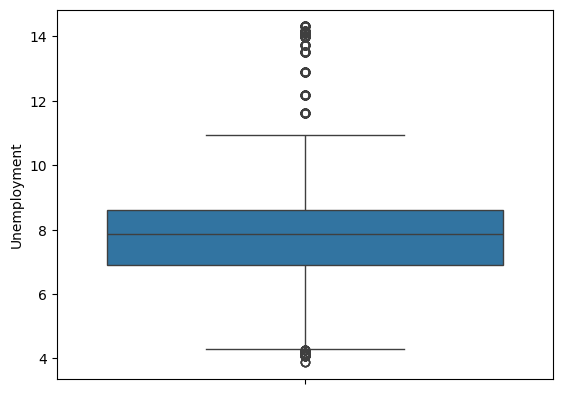

In [ ]:
sns.boxplot(dataset['Unemployment'])
plt.show()

Outlier Removal using IQR Method

In [ ]:
q3=dataset['Unemployment'].quantile(0.25)
q1=dataset['Unemployment'].quantile(0.75)
iqr=q3-q1
min_range = q1-1.5*iqr
max_range = q3+1.5*iqr
dataset['Unemployment'] = dataset['Unemployment'].clip(max_range,min_range)
min_range, max_range

(11.218499999999999, 4.2945)

In [ ]:
q3=dataset['Temperature'].quantile(0.25)
q1=dataset['Temperature'].quantile(0.75)
iqr=q3-q1
min_range = q1-1.5*iqr
max_range = q3+1.5*iqr
dataset['Temperature'] = dataset['Temperature'].clip(max_range,min_range)
min_range, max_range

(116.16, 6.240000000000002)

##Data Preprocessing

Formatting the date column

In [ ]:
dataset['Date']= pd.to_datetime(dataset['Date'], format= '%d-%m-%Y')
dataset['Days']= dataset['Date'].dt.day
dataset['Months']= dataset['Date'].dt.month
dataset['Years']= dataset['Date'].dt.year

In [ ]:
dataset.drop('Date', axis=1, inplace=True)

In [ ]:
dataset.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Years
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [ ]:
x = dataset.drop('Weekly_Sales', axis=1)
y = dataset['Weekly_Sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5148, 9) (5148,)
(1287, 9) (1287,)


##Feature Engineering

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##Model Training

LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Decision Tree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

Support Vector Machines

In [ ]:
sv = SVR()
sv.fit(x_train,y_train)

SVR()

Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

XGBRegressor

In [ ]:
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##Model Evaluation

In [ ]:
lr_predict = lr.predict(x_test)
dt_predict = dt.predict(x_test)
rf_predict = rf.predict(x_test)
sv_predict = sv.predict(x_test)
gb_predict = gb.predict(x_test)
xg_predict = xg.predict(x_test)

In [ ]:
def model_evaluate(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Model Performance:")
    print(f"R² Score: {r2*100}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")

In [ ]:
model_evaluate(y_test, lr_predict)

Model Performance:
R² Score: 15.365369537663643
Mean Absolute Error (MAE): 433493.58
Mean Squared Error (MSE): 272654325295.31


In [ ]:
model_evaluate(y_test, dt_predict)

Model Performance:
R² Score: 93.28917665743968
Mean Absolute Error (MAE): 73729.52
Mean Squared Error (MSE): 21619223722.56


In [ ]:
model_evaluate(y_test, rf_predict)

Model Performance:
R² Score: 96.00080460188846
Mean Absolute Error (MAE): 57190.25
Mean Squared Error (MSE): 12883590523.64


In [ ]:
model_evaluate(y_test, sv_predict)

Model Performance:
R² Score: -2.8420548959330993
Mean Absolute Error (MAE): 471114.16
Mean Squared Error (MSE): 331310374210.38


In [ ]:
model_evaluate(y_test, gb_predict)

Model Performance:
R² Score: 90.72754087237315
Mean Absolute Error (MAE): 128439.48
Mean Squared Error (MSE): 29871650333.45


In [ ]:
model_evaluate(y_test, xg_predict)

Model Performance:
R² Score: 97.73360837561353
Mean Absolute Error (MAE): 48179.63
Mean Squared Error (MSE): 7301284070.44


From the above evaluation, I found that XGBoost Regressor is the best model for this dataset as it is having the highest R-squared score.

##HyperParameter Tuning

XGBoost

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best R-squared score:", grid_search.best_score_*100)

best_xg_model = grid_search.best_estimator_
y_pred = best_xg_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Test R-squared score:", r2*100)


Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best R-squared score: 97.93529836878741
Test R-squared score: 97.96491703584337


Well for further enhancement I performed the HyperParameter Tuning and found that the maximum score XGBoost Model achieved is **97.96%** and the best hyperparameters found are:

**colsample_bytree:** 1.0,

**learning_rate:** 0.1,

**max_depth:** 7,

**n_estimators:** 200,

**subsample:** 0.8

#Conclusion

The Machine Learning pipeline aimed at forecasting Walmart's weekly sales effectively utilized various models, with XGBoost standing out as the best performer. By meticulously adjusting hyperparameters, the model attained outstanding performance with no indications of overfitting, maintaining a balance between training and testing accuracy.

After HyperParameter Tuning, findings suggests that the model effectively generalizes to new data, identifying intricate patterns in sales variations influenced by elements such as store location, holidays, weather, and regional economy


In [ ]:
%%shell
jupyter nbconvert --to html /content/M505A_Walmart_Sales_Prediction.ipynb

[NbConvertApp] Converting notebook /content/M505A_Walmart_Sales_Prediction.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 477339 bytes to /content/M505A_Walmart_Sales_Prediction.html
